# Multi Qubit quantum circuits

Now lets explore the quantum circuits that contain more than one wire(qubit). The number of computational basis states doubles with each additonal wire, so a thre wire circuit contains eight computational basis states |000> through |111>

In [1]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

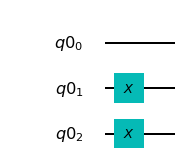

In [2]:
qr = QuantumRegister(3)

circ = QuantumCircuit(qr)

circ.x(qr[1])
circ.x(qr[2])

# Draw the circuit
circ.draw(output='mpl')

In [6]:
from qiskit import BasicAer
backend_sv_sim = BasicAer.get_backend('statevector_simulator')

# Execute the circuit on the state vector simulator
job_sim = execute(circ, backend_sv_sim)

# Grab the results from the job.
result_sim = job_sim.result()

#Obtain the state vector for the quantum circuit
quantum_state = result_sim.get_statevector(circ, decimals=3)
quantum_state

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j])

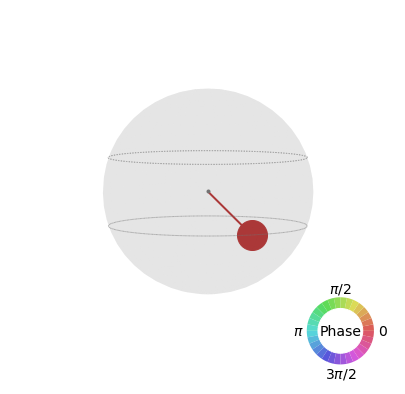

In [8]:
from qiskit.tools.visualization import plot_state_qsphere
plot_state_qsphere(quantum_state)


The quantum state vector

The output of the previously run cell contains a comma-separated string that represents the circuit's quantum state. Here are a few things to notice about this state vector:

    There are $2^n$ dimensions in the vector (8 in this example), where $n$ is the number of wires in the circuit (3 in this example).
    Each dimension holds the amplitude of that dimension as a complex number.
    The sum of the squared absolute values of these amplitudes is 1

In this example there is a 100% probability that a measurement will result in the state represented by dimension 6 (0 indexed) of this vector. This state is the $\vert110\rangle$ computational basis state, because $110$ is the binary representation of the number $6$. This matches the fact that the qubit states of the circuit are $\vert1\rangle$, $\vert1\rangle$ and $\vert0\rangle$ starting from the bottom of the circuit.

The state vector of this simple circuit may be calculated by taking the Kronecker product, also known as tensor product, of its individual qubit states. Beginning from the most-significant qubit (which is on the bottom wire), perform the following calculation:
$$ \begin{bmatrix} 0 \\ 1 \end{bmatrix}\otimes \begin{bmatrix} 0 \\ 1 \end{bmatrix}\otimes \begin{bmatrix} 1 \\ 0 \end{bmatrix}= \begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 1 \\ 0 \end{bmatrix} $$

Notice that the result of this calculation and the output of the get_statevector() method are equivalent. We'll now generate a visualization of the quantum state vector on a Q-sphere:
